In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.datasets import fashion_mnist
(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

Using TensorFlow backend.


In [4]:
for i in range(1,10,1):
    print(y_train_f[i])

0
0
3
0
2
7
2
5
5


In [5]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

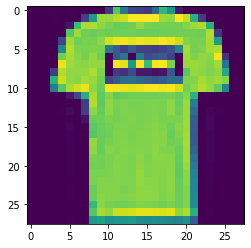

In [6]:
plt.imshow(x_train_f[1])

Normalizing data:
    In order to apply ANN on given data
    we have to normalize it. i.e it should
    range b/w 0-1. Dividing x_train&x_test by
    255

In [7]:
x_train_n=x_train_f/255
x_test_n=x_test_f/255
x_train_n
x_test_n

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train_n,y_train_f)

Building Sequential Model using Keras

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
import pydot
keras.utils.plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


Compiling Model and Fitting Train Data

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
              metrics=["accuracy"])

In [13]:
model_history = model.fit(x_train,y_train,epochs=50,
                         validation_data=(x_test,y_test))

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 4s 86us/sample - loss: 0.7444 - accuracy: 0.7574 - val_loss: 0.5219 - val_accuracy: 0.8229
Epoch 2/50
45000/45000 [==============================] - 4s 84us/sample - loss: 0.5020 - accuracy: 0.8263 - val_loss: 0.4569 - val_accuracy: 0.8409
Epoch 3/50
45000/45000 [==============================] - 4s 85us/sample - loss: 0.4552 - accuracy: 0.8416 - val_loss: 0.4269 - val_accuracy: 0.8485
Epoch 4/50
45000/45000 [==============================] - 4s 85us/sample - loss: 0.4295 - accuracy: 0.8509 - val_loss: 0.4579 - val_accuracy: 0.8323
Epoch 5/50
45000/45000 [==============================] - 4s 85us/sample - loss: 0.4082 - accuracy: 0.8581 - val_loss: 0.4233 - val_accuracy: 0.8528
Epoch 6/50
45000/45000 [==============================] - 4s 85us/sample - loss: 0.3930 - accuracy: 0.8638 - val_loss: 0.4074 - val_accuracy: 0.8513
Epoch 7/50
45000/45000 [==============================] 

In [14]:
model_history.history

{'loss': [0.7444103643311395,
  0.5020005126953125,
  0.45524680433803133,
  0.42946469948556687,
  0.4081701071315342,
  0.39298791291448804,
  0.37924280874729155,
  0.36857190895080566,
  0.35731106191476186,
  0.348937593626976,
  0.33984484673076204,
  0.3312473534292645,
  0.3233864412519667,
  0.3175634712855021,
  0.3105795229037603,
  0.30489706195195515,
  0.2999216752529144,
  0.29335416683620874,
  0.28745898733403946,
  0.28240692252053157,
  0.27896143196225165,
  0.2721483662101958,
  0.2677828105794059,
  0.26446898011631437,
  0.26064471136762035,
  0.25534209718704226,
  0.2509208135233985,
  0.24728333524598015,
  0.24381602001720004,
  0.2395866140736474,
  0.23531641525559954,
  0.2320094476832284,
  0.2283383656197124,
  0.22562295665078694,
  0.22020588272412617,
  0.21804273960325454,
  0.21385179264280532,
  0.2115581375837326,
  0.20786910401715172,
  0.20489131971001626,
  0.20159979442490472,
  0.197598909857538,
  0.19499800008800294,
  0.19297802720334795,

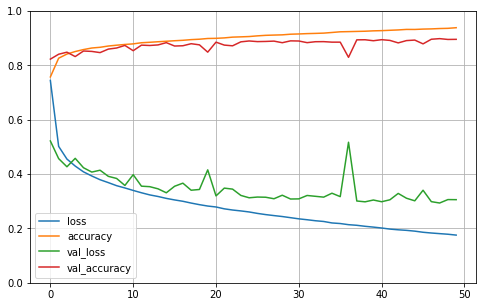

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
x_test_f=x_test_f/255

In [17]:
model.evaluate(x_test_f,y_test_f)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.3472 - accuracy: 0.8816


[0.3472249630272388, 0.8816]

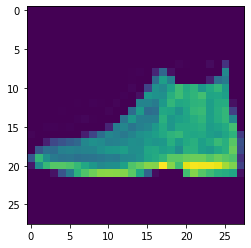

In [18]:
plt.imshow(x_test_n[0])

In [19]:
x_new=x_test[:3]

In [20]:
xnp=model.predict_classes(x_new)

In [21]:
np.array(classes)[xnp]

array(['Coat', 'T-shirt/top', 'Sneaker'], dtype='<U11')

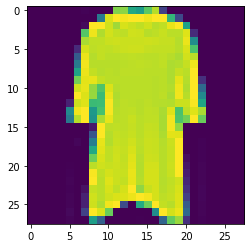

In [22]:
plt.imshow(x_new[0]*255)

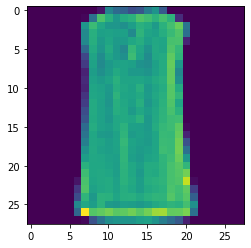

In [23]:
plt.imshow(x_new[1]*255)

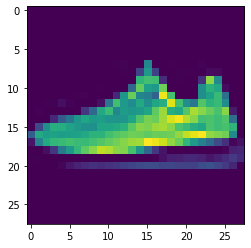

In [24]:
plt.imshow(x_new[2]*255)